<a href="https://colab.research.google.com/github/GopiMindgloer/Machine_Learning/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#install dependencies
!pip install -q kaggle

In [0]:
#import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [6]:
#connect with kaggle 
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
#check if the file is uploaded
ls -lha kaggle.json


-rw-r--r-- 1 root root 68 Jan 23 11:01 kaggle.json


In [0]:
#create a directory to put the json file and give it necessary permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
#download the dataset directly from kaggle
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.3MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 8.38MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.17MB/s]


In [10]:
!ls

gender_submission.csv  kaggle.json  sample_data  test.csv  train.csv


In [0]:
dataset = pd.read_csv('train.csv')

In [26]:
print("number of datapoints = " +str(len(dataset.index)))

number of datapoints = 891


#Analyzing the data

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


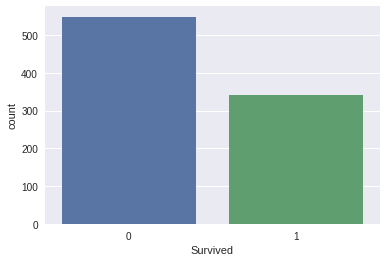

In [28]:
sns.countplot(x = "Survived", data = dataset)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


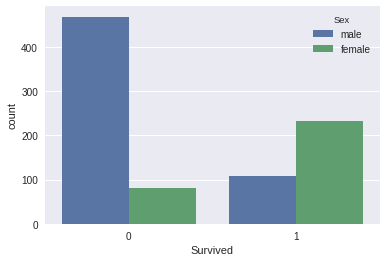

In [29]:
sns.countplot(x = "Survived", hue = "Sex", data = dataset)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


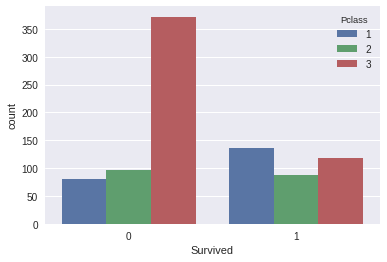

In [30]:
sns.countplot(x = "Survived", hue = "Pclass", data = dataset)
plt.show()

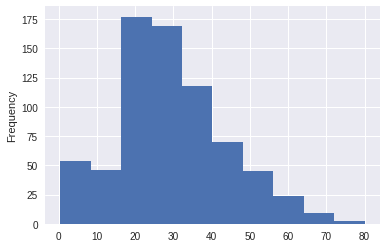

In [31]:
dataset["Age"].plot.hist()
plt.show()

#Data Wrangling

In [32]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

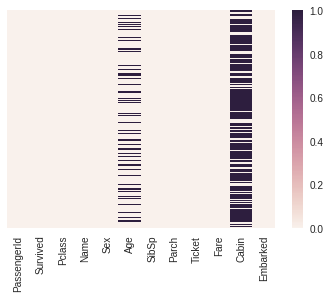

In [33]:
sns.heatmap(dataset.isnull(), yticklabels = False )
plt.show()

In [0]:
dataset.dropna(inplace = True)

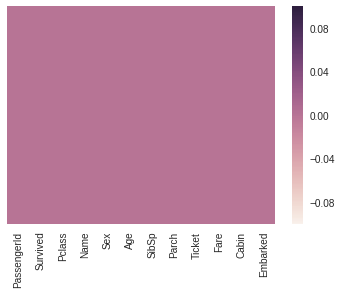

In [35]:
sns.heatmap(dataset.isnull(), yticklabels = False )
plt.show()

In [36]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

We can also use imputation to fill in missing data.

In [0]:
sex = pd.get_dummies(dataset["Sex"],drop_first = True)
embark = pd.get_dummies(dataset["Embarked"],drop_first = True)
pclass = pd.get_dummies(dataset["Pclass"],drop_first = True)


In [0]:
dataset = pd.concat([dataset,sex,embark,pclass],axis= 1)

In [39]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,0,0


In [0]:
dataset.drop(['Name','PassengerId','Ticket','Fare','Cabin','Embarked','Sex'],axis = 1,inplace = True)

In [0]:
dataset.drop(['Pclass'],axis = 1,inplace = True)

In [89]:
dataset.head(5)

,Survived,Age,SibSp,Parch,male,Q,S,2,3
1,1,38.0,1,0,0,0,0,0,0
3,1,35.0,1,0,0,0,1,0,0
6,0,54.0,0,0,1,0,1,0,0
10,1,4.0,1,1,0,0,1,0,1
11,1,58.0,0,0,0,0,1,0,0


#Train Data

In [0]:
x = dataset.drop("Survived",axis = 1)
y = dataset["Survived"]

In [0]:
X_train = x
y_train = y

In [0]:
X_test = pd.read_csv("test.csv")
y_test = pd.read_csv("gender_submission.csv")

In [0]:
dataset2 = pd.merge(X_test,y_test,on = 'PassengerId')

In [0]:
sex = pd.get_dummies(X_test["Sex"],drop_first = True)
pclass = pd.get_dummies(X_test["Pclass"],drop_first = True)
embark = pd.get_dummies(X_test["Embarked"],drop_first = True)

In [0]:
dataset2.dropna(inplace = True)

In [0]:
dataset2 = pd.concat([dataset2,sex,pclass,embark],axis = 1)

In [0]:
dataset2.drop(['PassengerId','Pclass','Name','Ticket','Fare','Embarked','Cabin'],axis = 1,inplace = True)

In [0]:
dataset2.dropna(inplace = True)

In [0]:
dataset2.drop(['Sex'],axis = 1,inplace = True)

In [0]:
X_test = dataset2.drop(['Survived'],axis = 1)

In [0]:
y_test = dataset2['Survived']

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model = LogisticRegression()

In [92]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
predictions = model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [117]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.77      0.87        43\n         1.0       0.81      1.00      0.90        44\n\n   micro avg       0.89      0.89      0.89        87\n   macro avg       0.91      0.88      0.88        87\nweighted avg       0.91      0.89      0.88        87\n'

In [0]:
from sklearn.metrics import confusion_matrix

In [119]:
confusion_matrix(y_test,predictions)

array([[33, 10],
       [ 0, 44]])

In [0]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy_score(y_test,predictions)

0.8850574712643678